In [22]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Data Loading**

In [23]:
# Fashion MNIST dataset
fashion = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

**Downloading Few Test images from dataset**

In [7]:
#images_to_download = test_images[6:9]

In [8]:
"""
desired_size = (251, 248)

for i, image in enumerate(images_to_download):
    # Convert image to PIL Image
    img = Image.fromarray(image)
    
    # Resize image
    img_resized = img.resize(desired_size, Image.ANTIALIAS)
    
    # Convert back to numpy array
    img_resized_array = np.array(img_resized)
    
    # Save resized image as PNG (or any format you prefer)
    img_resized.save(f'image_{i}.png')
"""

C:\Users\HP\AppData\Local\Temp\ipykernel_11196\765489835.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(desired_size, Image.ANTIALIAS)


In [24]:
print(len(train_images))
print(len(test_images))
print(train_images[0].shape)

60000
10000
(28, 28)


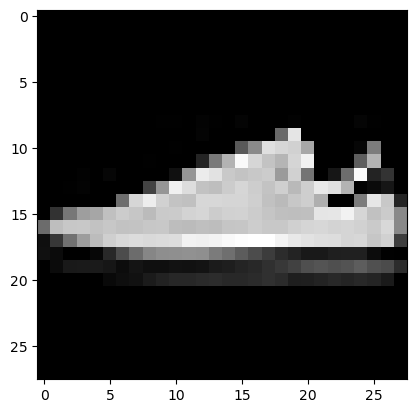

In [25]:
# Display an image from the dataset
plt.imshow(train_images[6], cmap='gray')
plt.show()

In [26]:
print(train_labels[0])

9


**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

In [27]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [28]:
# Reshaping images to a single channel => (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [29]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Building CNN**

In [32]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [33]:
# Compile and train the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

**Model Training**

In [34]:
Model_history = model.fit(train_images, train_labels, epochs=6,validation_data=(test_images, test_labels))

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7296 - loss: 0.7338 - val_accuracy: 0.8607 - val_loss: 0.3825
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8717 - loss: 0.3568 - val_accuracy: 0.8789 - val_loss: 0.3366
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8916 - loss: 0.3019 - val_accuracy: 0.8835 - val_loss: 0.3211
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9023 - loss: 0.2680 - val_accuracy: 0.8900 - val_loss: 0.3086
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9115 - loss: 0.2410 - val_accuracy: 0.8937 - val_loss: 0.2920
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9197 - loss: 0.2168 - val_accuracy: 0.8989 - val_loss: 0.2918


**Model Evaluation**

In [36]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8989 - loss: 0.2918

Test Accuracy: 0.8988999724388123


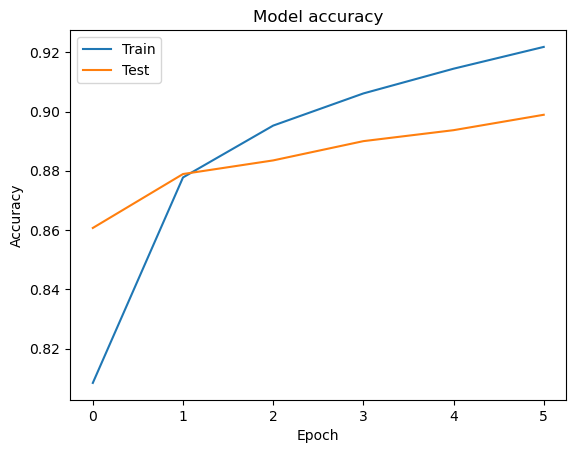

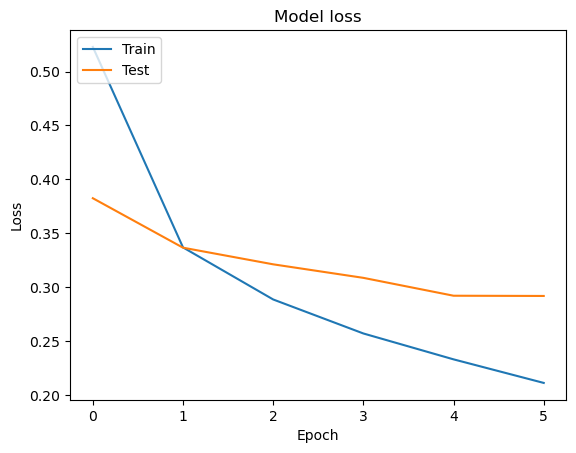

In [39]:
# Plot training & validation accuracy values

plt.plot(Model_history.history['accuracy'])
plt.plot(Model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Model_history.history['loss'])
plt.plot(Model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
model.save('trained_fashion_model.h5')